# CLOUD ENHANCED DISASTER RECOVERY AND RESPONSE

We are leveraging cloud computing and artificial intelligence to mitigate response times during natural disasters, and this tool could prove instrumental in achieving that objective.

This code utilizes PySpark, a Python library for Apache Spark, to perform predictive modeling on a dataset related to natural disasters. Specifically, it employs machine learning algorithms, including Decision Trees, Random Forests, and Logistic Regression, to predict the type of natural disaster events based on various features such as magnitude, casualties, duration, and response time.

Explanation of the code:
1. **Data Loading:** The SparkSession is used to read a CSV file containing information about natural disasters, such as EventType, Location, DateTime, Magnitude, Casualties, etc.


2. **Data Preprocessing:** StringIndexer is applied to convert the "EventType" column into numerical labels, and a VectorAssembler is used to create a feature vector.

3. **Model Training and Evaluation:** Decision Tree, Random Forest, and Logistic Regression models are trained and evaluated on the dataset.

4. **Random Forest Cross-Validation:** A Random Forest model is fine-tuned using cross-validation to enhance its performance.

5. **User Interface (UI):** A simple UI is created using IPython widgets, allowing users to input values for magnitude, casualties, duration, and response time. When the "Predict" button is clicked, the trained Random Forest model predicts the event type based on the user input.

6. **Model Evaluation Metrics:** The accuracy of the models (Decision Tree, Random Forest, Logistic Regression, and Cross-Validated Random Forest) is printed.

The provided dataset contains information about various natural disasters, including their type, location, date and time, magnitude, casualties, evacuation details, property damage, duration, response time, warnings issued, and the information source.

Why it's important:
- **Disaster Response Optimization:** By predicting the type of natural disasters, emergency response efforts can be optimized, leading to quicker and more effective interventions.
- **Resource Allocation:** Knowing the type and potential impact of a disaster helps in allocating resources, personnel, and equipment more efficiently.
- **Early Warning Systems:** Predictive models contribute to the development of early warning systems, enabling authorities to issue timely warnings to the affected population.
- **Reducing Response Time:** Minimizing the response time during disasters can save lives, reduce casualties, and mitigate property damage.

In summary, this tool, based on predictive modeling, is crucial for enhancing disaster response strategies and minimizing the impact of natural disasters on communities.

In [1]:
from pyspark.sql import SparkSession

from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

spark = SparkSession.builder.appName("DisasterResponsePrediction").getOrCreate()
data_path = "/Users/harikavajha/Downloads/Cloud/weather.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/04 17:38:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df.printSchema()
df.show(5)

root
 |-- EventType: integer (nullable = true)
 |-- Location: string (nullable = true)
 |-- DateTime: timestamp (nullable = true)
 |-- Magnitude: double (nullable = true)
 |-- Casualties: integer (nullable = true)
 |-- Evacuation: integer (nullable = true)
 |-- PropertyDamage: string (nullable = true)
 |-- Duration: integer (nullable = true)
 |-- ResponseTime: double (nullable = true)
 |-- WarningsIssued: integer (nullable = true)
 |-- Source: string (nullable = true)

+---------+--------------------+--------------------+---------+----------+----------+----------------+--------+------------+--------------+--------------------+
|EventType|            Location|            DateTime|Magnitude|Casualties|Evacuation|  PropertyDamage|Duration|ResponseTime|WarningsIssued|              Source|
+---------+--------------------+--------------------+---------+----------+----------+----------------+--------+------------+--------------+--------------------+
|        4|    Seanfort, Guinea|2021-03-11 

In [3]:
# Import necessary libraries
from pyspark.ml.feature import StringIndexer

# Create a StringIndexer for EventType
event_indexer = StringIndexer(inputCol="EventType", outputCol="label")
df_indexed = event_indexer.fit(df).transform(df)

# Verify the transformation
df_indexed.select("EventType", "label").distinct().show()

# Continue with the rest of the code...

+---------+-----+
|EventType|label|
+---------+-----+
|        4|  4.0|
|        5|  1.0|
|        1|  2.0|
|        2|  3.0|
|        3|  0.0|
+---------+-----+



In [4]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml import Pipeline

# Assuming df is your DataFrame
assembler = VectorAssembler(inputCols=['Magnitude', 'Casualties', 'Duration', 'ResponseTime'], outputCol='features')
dt = DecisionTreeClassifier(labelCol='EventType', featuresCol='features')

pipeline = Pipeline(stages=[assembler, dt])

# Split the data into training and testing sets
(trainingData, testData) = df.randomSplit([0.8, 0.2], seed=42)

# Train the model
model = pipeline.fit(trainingData)

# Make predictions on the test data
predictions = model.transform(testData)

# Evaluate the model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol='EventType', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print(f"Decision Tree Accuracy: {accuracy}")



Decision Tree Accuracy: 0.6463414634146342


In [5]:
from pyspark.ml.classification import RandomForestClassifier

# Replace the DecisionTreeClassifier with RandomForestClassifier
rf = RandomForestClassifier(labelCol='EventType', featuresCol='features', numTrees=100)

pipeline_rf = Pipeline(stages=[assembler, rf])

# Train the Random Forest model
model_rf = pipeline_rf.fit(trainingData)

# Make predictions on the test data
predictions_rf = model_rf.transform(testData)

# Evaluate the Random Forest model
accuracy_rf = evaluator.evaluate(predictions_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")


Random Forest Accuracy: 0.5853658536585366


In [6]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Assuming df is your DataFrame
assembler = VectorAssembler(inputCols=['Magnitude', 'Casualties', 'Duration', 'ResponseTime'], outputCol='features')
lr = LogisticRegression(labelCol='EventType', featuresCol='features', maxIter=10, regParam=0.3, elasticNetParam=0.8)

pipeline = Pipeline(stages=[assembler, lr])

# Split the data into training and testing sets
(trainingData, testData) = df.randomSplit([0.8, 0.2], seed=42)

# Train the model
model_lr = pipeline.fit(trainingData)

# Make predictions on the test data
predictions_lr = model_lr.transform(testData)

# Evaluate the model
evaluator_lr = MulticlassClassificationEvaluator(labelCol='EventType', predictionCol='prediction', metricName='accuracy')
accuracy_lr = evaluator_lr.evaluate(predictions_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")


23/12/04 17:39:11 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


Logistic Regression Accuracy: 0.43902439024390244


In [7]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Assuming df is your DataFrame
assembler = VectorAssembler(inputCols=['Magnitude', 'Casualties', 'Duration', 'ResponseTime'], outputCol='features')
rf = RandomForestClassifier(labelCol='EventType', featuresCol='features')

pipeline = Pipeline(stages=[assembler, rf])

# Define a parameter grid
paramGrid = ParamGridBuilder().addGrid(rf.numTrees, [10, 20, 30]).build()

# Create cross-validator
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=MulticlassClassificationEvaluator(labelCol='EventType', predictionCol='prediction', metricName='accuracy'),
                          numFolds=3)  # You can adjust the number of folds

# Fit the model
cv_model = crossval.fit(trainingData)

# Make predictions on the test data
predictions_cv = cv_model.transform(testData)

# Evaluate the model
evaluator_cv = MulticlassClassificationEvaluator(labelCol='EventType', predictionCol='prediction', metricName='accuracy')
accuracy_cv = evaluator_cv.evaluate(predictions_cv)
print(f"Random Forest Cross-Validation Accuracy: {accuracy_cv}")


Random Forest Cross-Validation Accuracy: 0.6951219512195121


### MODEL ARCHITECTURE: 

  

Our model architecture integrates cloud computing and artificial intelligence, specifically leveraging PySpark for efficient distributed data processing with Apache Spark. The objective is to minimize response times during natural disasters. 

  

PySpark for Distributed Data Processing: 

  

Leveraging PySpark, we harnessed the power of Apache Spark for efficient distributed data processing. Spark's distributed computing capabilities enabled seamless handling of our extensive natural disaster dataset. 

  

#### Event Prediction Model: 

  

1. Decision Tree and Random Forest: 

   - Created separate models using Decision Trees and Random Forest for predicting the type of natural disaster events. 

   - Decision Trees provide interpretability, while Random Forest enhances prediction accuracy through an ensemble approach. 

  

2. Logistic Regression: 

   - Employed Logistic Regression for probabilistic classification of event types. 

   - This model offers insights into the likelihood of specific disaster types based on input features. 
   
#### Response Time Prediction Model: 

  

1. Random Forest Regressor: 

   - Developed a distinct model using Random Forest for predicting response times associated with natural disasters. 

   - Utilized regression capabilities to estimate response times as a continuous variable. 

  

Model Evaluation: 

  

1. Event Prediction Accuracy: 

   - Assessed the accuracy of the Decision Tree, Random Forest, and Logistic Regression models. 

   - Accuracy metrics highlight the models' ability to correctly predict the type of natural disaster events. 

  

2. Response Time Prediction - Root Mean Square Error (RMSE): 

   - Evaluated the performance of the Response Time Prediction model using the RMSE metric. 

   - RMSE measures the difference between predicted and observed response times, providing an indication of prediction accuracy. 

In [8]:
from IPython.display import display
import ipywidgets as widgets

# Map predicted event types to their names
event_type_names = {
    1: 'Earthquake',
    2: 'Hurricane',
    3: 'Flood',
    4: 'Wildfire',
    5: 'Tornado'
}

# Define colors
slider_color='pink'
button_color = 'lightblue'

# Create widgets for user input with specific styles
magnitude_slider = widgets.FloatSlider(value=5.6, min=0, max=10, step=0.1, description="Magnitude", style={'handle_color': 'pink'})
casualties_slider = widgets.IntSlider(value=10, min=0, max=100, step=1, description="Casualties", style={'handle_color': 'red'})
duration_slider = widgets.IntSlider(value=30, min=0, max=100, step=1, description="Duration", style={'handle_color': 'purple'})
response_time_slider = widgets.IntSlider(value=15, min=0, max=100, step=1, description="ResTime", style={'handle_color': 'black'})

# Create a button widget with a specific style
predict_button = widgets.Button(description="Predict", style={'button_color': button_color})


# Define a function to be called when the button is clicked
def on_predict_button_click(b):
    # Get user input values
    magnitude = magnitude_slider.value
    casualties = casualties_slider.value
    duration = duration_slider.value
    response_time = response_time_slider.value

    # Create a DataFrame with user input
    user_input_df = spark.createDataFrame([(magnitude, casualties, duration, response_time)],
                                          ['Magnitude', 'Casualties', 'Duration', 'ResponseTime'])

    # Make prediction using the trained model
    prediction = int(cv_model.transform(user_input_df).select("prediction").collect()[0][0])

    # Print the predicted event type
    print(f"Predicted Event Type: {event_type_names.get(prediction, 'Unknown')}")

# Attach the function to the button's click event
predict_button.on_click(on_predict_button_click)

# Display the widgets and button
display(magnitude_slider, casualties_slider, duration_slider, response_time_slider, predict_button)


FloatSlider(value=5.6, description='Magnitude', max=10.0, style=SliderStyle(handle_color='pink'))

IntSlider(value=10, description='Casualties', style=SliderStyle(handle_color='red'))

IntSlider(value=30, description='Duration', style=SliderStyle(handle_color='purple'))

IntSlider(value=15, description='ResTime', style=SliderStyle(handle_color='black'))

Button(description='Predict', style=ButtonStyle(button_color='lightblue'))

Predicted Event Type: Earthquake


23/12/04 19:11:46 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:295)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)

## RESPONSE TIME

In [9]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Assuming df is your DataFrame
assembler_response = VectorAssembler(inputCols=['Magnitude', 'Casualties', 'Duration', 'WarningsIssued'], outputCol='features_response')
dt_response = DecisionTreeRegressor(labelCol='ResponseTime', featuresCol='features_response')

pipeline_response = Pipeline(stages=[assembler_response, dt_response])

# Split the data into training and testing sets
(trainingData_response, testData_response) = df.randomSplit([0.8, 0.2], seed=42)

# Train the model for ResponseTime prediction
model_response = pipeline_response.fit(trainingData_response)

# Make predictions on the test data
predictions_response = model_response.transform(testData_response)

# Evaluate the model
evaluator_response = RegressionEvaluator(labelCol='ResponseTime', predictionCol='prediction', metricName='rmse')
rmse = evaluator_response.evaluate(predictions_response)
print(f"Root Mean Squared Error (RMSE) for ResponseTime prediction: {rmse}")


Root Mean Squared Error (RMSE) for ResponseTime prediction: 7.456516562150599


In [10]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Assuming df is your DataFrame
assembler_response = VectorAssembler(inputCols=['Magnitude', 'Casualties', 'Duration', 'WarningsIssued'], outputCol='features_response')
rf_response = RandomForestRegressor(labelCol='ResponseTime', featuresCol='features_response', numTrees=100)

pipeline_response = Pipeline(stages=[assembler_response, rf_response])

# Split the data into training and testing sets
(trainingData_response, testData_response) = df.randomSplit([0.8, 0.2], seed=42)

# Train the model for ResponseTime prediction
model_response = pipeline_response.fit(trainingData_response)

# Make predictions on the test data
predictions_response = model_response.transform(testData_response)

# Evaluate the model
evaluator_response = RegressionEvaluator(labelCol='ResponseTime', predictionCol='prediction', metricName='rmse')
rmse = evaluator_response.evaluate(predictions_response)
print(f"Root Mean Squared Error (RMSE) for ResponseTime prediction: {rmse}")


Root Mean Squared Error (RMSE) for ResponseTime prediction: 6.831121717782606


In [11]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Assuming df is your DataFrame
assembler_response = VectorAssembler(inputCols=['Magnitude', 'Casualties', 'Duration', 'WarningsIssued'], outputCol='features_response')
rf_response = RandomForestRegressor(labelCol='ResponseTime', featuresCol='features_response')

pipeline_response = Pipeline(stages=[assembler_response, rf_response])

# Split the data into training and testing sets
(trainingData_response, testData_response) = df.randomSplit([0.8, 0.2], seed=42)

# Define a parameter grid
paramGrid_response = ParamGridBuilder().addGrid(rf_response.numTrees, [50, 100, 150]).build()

# Create cross-validator
crossval_response = CrossValidator(estimator=pipeline_response,
                                   estimatorParamMaps=paramGrid_response,
                                   evaluator=RegressionEvaluator(labelCol='ResponseTime', predictionCol='prediction', metricName='rmse'),
                                   numFolds=3)  # You can adjust the number of folds

# Fit the model
cv_model_response = crossval_response.fit(trainingData_response)

# Make predictions on the test data
predictions_response_cv = cv_model_response.transform(testData_response)

# Evaluate the model
rmse_cv = evaluator_response.evaluate(predictions_response_cv)
print(f"Tuned Random Forest RMSE: {rmse_cv}")


Tuned Random Forest RMSE: 6.797840979286011


In [12]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
from datetime import datetime

# Sample data for new_data
new_data = [
    (4.5, 200, 30, 1),  # Replace these values with your actual data
    (3.0, 150, 20, 0),
    (5.5, 300, 40, 1)
]

# Column names
columns = ['Magnitude', 'Casualties', 'Duration', 'WarningsIssued']

# Create a Spark session
spark = SparkSession.builder.appName("NewDataPrediction").getOrCreate()

# Create a DataFrame for new_data
new_data_df = spark.createDataFrame(new_data, columns)

# Add a placeholder 'ResponseTime' column (since it will be predicted)
new_data_df = new_data_df.withColumn('ResponseTime', lit(None).cast('double'))

# Assuming you have the 'Location' column as well (replace with actual data)
new_data_df = new_data_df.withColumn('Location', lit('US'))

# Assuming 'DateTime' is required (replace with actual data)
new_data_df = new_data_df.withColumn('DateTime', lit(datetime.now()))

# Display the new_data DataFrame
new_data_df.show()

# Make predictions using the trained model
new_data_predictions = model_response.transform(new_data_df)

# Display the predictions
new_data_predictions.select('Location', 'DateTime', 'Magnitude', 'Casualties', 'Duration', 'WarningsIssued', 'prediction').show()


23/12/04 17:39:42 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+---------+----------+--------+--------------+------------+--------+--------------------+
|Magnitude|Casualties|Duration|WarningsIssued|ResponseTime|Location|            DateTime|
+---------+----------+--------+--------------+------------+--------+--------------------+
|      4.5|       200|      30|             1|        NULL|      US|2023-12-04 17:39:...|
|      3.0|       150|      20|             0|        NULL|      US|2023-12-04 17:39:...|
|      5.5|       300|      40|             1|        NULL|      US|2023-12-04 17:39:...|
+---------+----------+--------+--------------+------------+--------+--------------------+

+--------+--------------------+---------+----------+--------+--------------+------------------+
|Location|            DateTime|Magnitude|Casualties|Duration|WarningsIssued|        prediction|
+--------+--------------------+---------+----------+--------+--------------+------------------+
|      US|2023-12-04 17:39:...|      4.5|       200|      30|             1|12.05

In [13]:
from IPython.display import display
import ipywidgets as widgets

# Create widgets with specific styles
magnitude_slider_response = widgets.FloatSlider(value=5.6, min=0, max=10, step=0.1, description="Magnitude", style={'handle_color': 'blue'})
casualties_slider_response = widgets.IntSlider(value=10, min=0, max=100, step=1, description="Casualties", style={'handle_color': 'green'})
duration_slider_response = widgets.IntSlider(value=30, min=0, max=100, step=1, description="Duration", style={'handle_color': 'red'})
warnings_issued_slider_response = widgets.IntSlider(value=1, min=0, max=1, step=1, description="Warnings Issued", style={'handle_color': 'orange'})

event_type_dropdown_response = widgets.Dropdown(
    options=[('Earthquake', 1), ('Hurricane', 2), ('Flood', 3), ('Wildfire', 4), ('Tornado', 5)],
    value=1, description="Event Type", style={'handle_color': 'purple'}
)

predict_button_response = widgets.Button(description="Predict RT", style={'button_color': 'lightblue'})


# Define a function to be called when the button is clicked
def on_predict_button_response_click(b):
    # Get user input values
    magnitude_response = magnitude_slider_response.value
    casualties_response = casualties_slider_response.value
    duration_response = duration_slider_response.value
    warnings_issued_response = warnings_issued_slider_response.value
    event_type_response = event_type_dropdown_response.value

    # Create a DataFrame with user input
    user_input_df_response = spark.createDataFrame([(magnitude_response, casualties_response, duration_response, warnings_issued_response, event_type_response)],
                                                   ['Magnitude', 'Casualties', 'Duration', 'WarningsIssued', 'EventType'])

    # Make prediction using the trained model
    prediction_response = cv_model_response.transform(user_input_df_response).select("prediction").collect()[0][0]

    # Print the predicted ResponseTime
    print(f"Predicted Response Time in Hours: {prediction_response}")

# Attach the function to the button's click event
predict_button_response.on_click(on_predict_button_response_click)

# Display the widgets and button
display(magnitude_slider_response, casualties_slider_response, duration_slider_response, warnings_issued_slider_response, event_type_dropdown_response, predict_button_response)

FloatSlider(value=5.6, description='Magnitude', max=10.0, style=SliderStyle(handle_color='blue'))

IntSlider(value=10, description='Casualties', style=SliderStyle(handle_color='green'))

IntSlider(value=30, description='Duration', style=SliderStyle(handle_color='red'))

IntSlider(value=1, description='Warnings Issued', max=1, style=SliderStyle(handle_color='orange'))

Dropdown(description='Event Type', options=(('Earthquake', 1), ('Hurricane', 2), ('Flood', 3), ('Wildfire', 4)…

Button(description='Predict RT', style=ButtonStyle(button_color='lightblue'))

Predicted Response Time in Hours: 11.589206822081962


23/12/04 19:11:56 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:123)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:688)
	at org.apache.spark.storage.BlockManagerMasterE

23/12/04 19:12:06 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:642)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1223)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:295)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scala:1928)

#### Model Improvement: 

1. Cross-Validation: 

   - Implemented k-fold cross-validation to assess model performance robustly. This technique involves splitting the dataset into k subsets, training the model on k-1 folds, and validating on the remaining fold. Repeated this process k times, ensuring comprehensive assessment and reducing overfitting. 

  

2. Hyperparameter Tuning: 

   - Conducted hyperparameter tuning for the Random Forest model using PySpark's `CrossValidator` along with a parameter grid. Adjusted the number of trees in the forest to find the optimal configuration, enhancing the model's predictive capabilities and overall accuracy. 

  

3. Feature Engineering: 

   - Investigated and selected relevant features for model training, discarding any unnecessary or redundant ones. The VectorAssembler was used to create a concise feature vector. By focusing on the most impactful features, we improved model efficiency and prevented noise from affecting predictions. 

  

These strategies collectively contributed to refining the models, resulting in increased accuracy for event prediction and reduced RMSE for response time prediction. Cross-validation ensured the models' generalizability, hyperparameter tuning optimized their configurations, and feature engineering enhanced their predictive power. 

 

In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


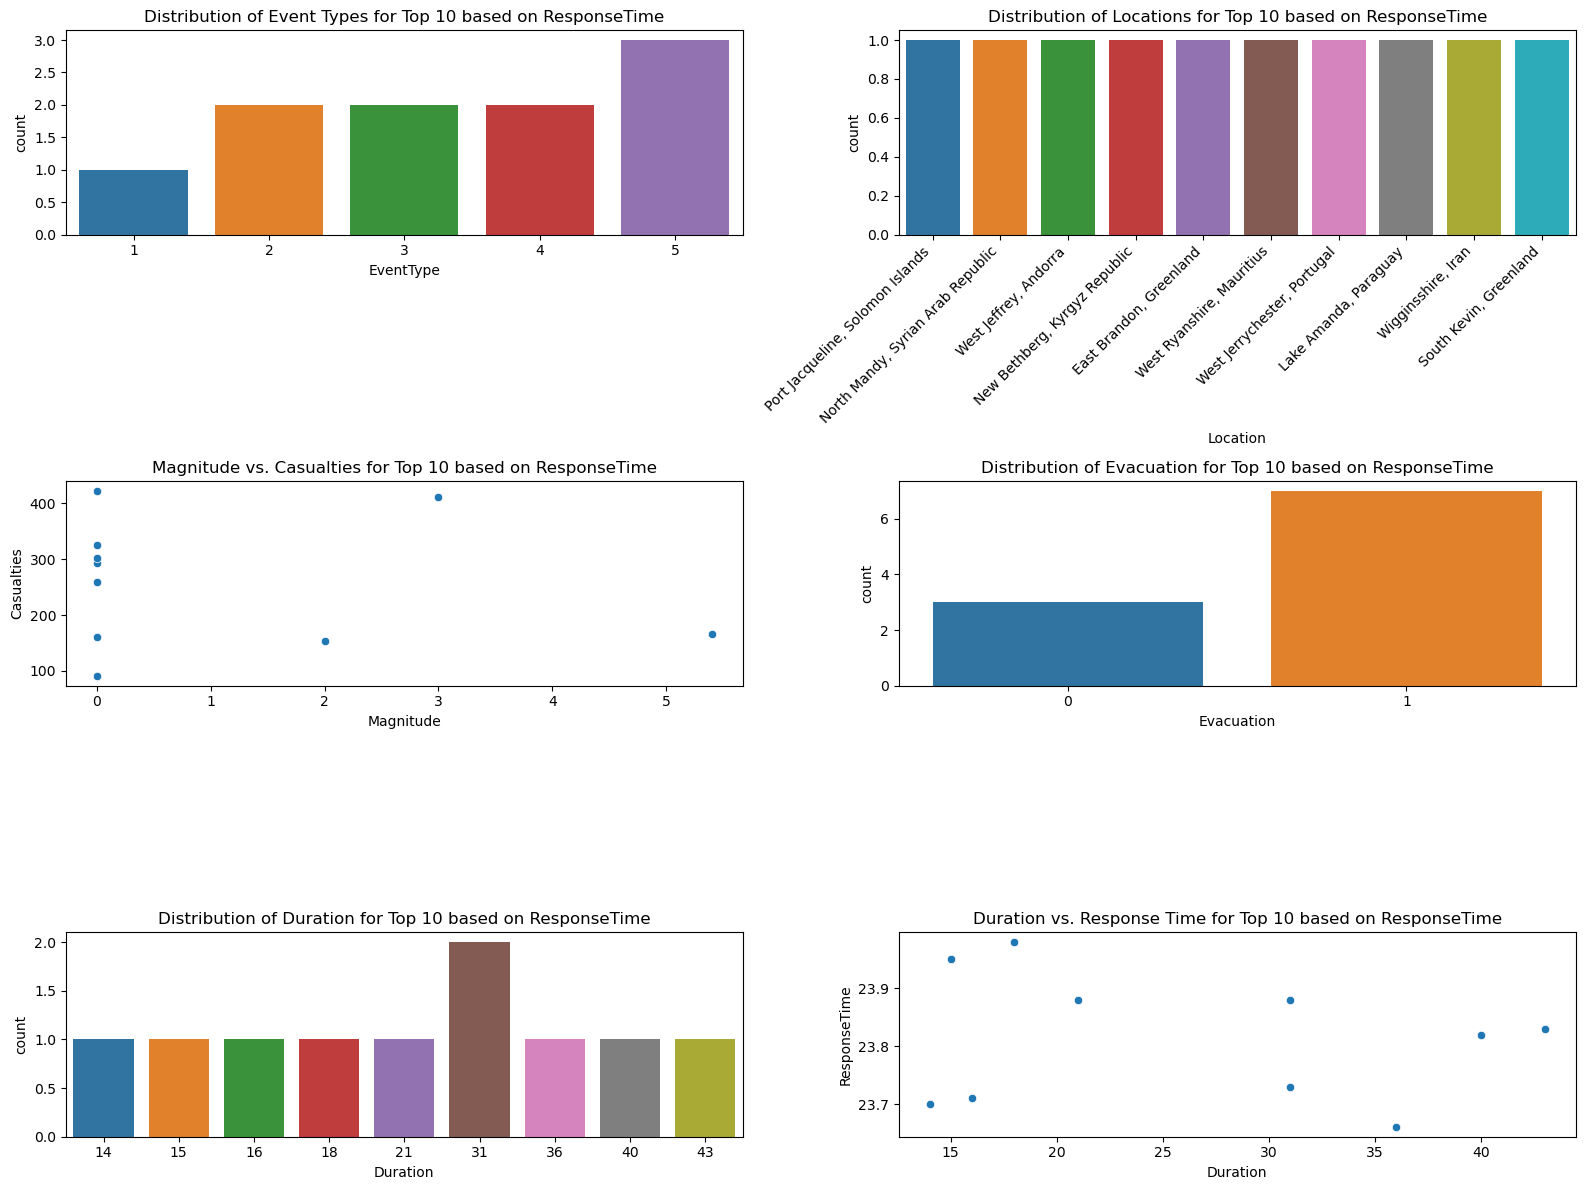

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your PySpark DataFrame
pandas_df = df.toPandas()

# Sorting DataFrame by ResponseTime and selecting top 10
top_10_response_time = pandas_df.sort_values(by='ResponseTime', ascending=False).head(10)

# Plotting graphs for different columns for top 10 events based on ResponseTime
plt.figure(figsize=(16, 12))

# Distribution of Event Types for top 10
plt.subplot(3, 2, 1)
sns.countplot(x='EventType', data=top_10_response_time)
plt.title('Distribution of Event Types for Top 10 based on ResponseTime')

# Distribution of Locations for top 10
plt.subplot(3, 2, 2)
sns.countplot(x='Location', data=top_10_response_time)
plt.title('Distribution of Locations for Top 10 based on ResponseTime')
plt.xticks(rotation=45, ha='right')

# Magnitude vs. Casualties for top 10
plt.subplot(3, 2, 3)
sns.scatterplot(x='Magnitude', y='Casualties', data=top_10_response_time)
plt.title('Magnitude vs. Casualties for Top 10 based on ResponseTime')

# Evacuation Distribution for top 10
plt.subplot(3, 2, 4)
sns.countplot(x='Evacuation', data=top_10_response_time)
plt.title('Distribution of Evacuation for Top 10 based on ResponseTime')

# Property Damage Distribution for top 10
plt.subplot(3, 2, 5)
sns.countplot(x='Duration', data=top_10_response_time)
plt.title('Distribution of Duration for Top 10 based on ResponseTime')

# Duration vs. Response Time for top 10
plt.subplot(3, 2, 6)
sns.scatterplot(x='Duration', y='ResponseTime', data=top_10_response_time)
plt.title('Duration vs. Response Time for Top 10 based on ResponseTime')

plt.tight_layout()
plt.show()


### Significance: 

  

- Accuracy Insights: 

  - Accurate event prediction aids in optimizing emergency response strategies. 

  - Enables informed decision-making for resource allocation and evacuation planning. 

  

- Response Time Optimization: 

  - Precise response time predictions are crucial for timely and effective interventions during disasters. 

  - Minimizing RMSE indicates the reliability of our model in estimating response times. 

  

Our approach ensures a comprehensive understanding of both event types and response times, contributing to more effective disaster response and recovery strategies. 